In [1]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

from tqdm import tqdm
tqdm.pandas()

# Ensure plots are inline in Jupyter
%matplotlib inline

In [3]:
# Cell 2: Load dataset
# Replace with actual path to your CSV file from the Google Drive
data_path = "../data/complaints.csv"
df = pd.read_csv(data_path)
df.shape


C:\Users\hp\AppData\Local\Temp\ipykernel_38416\1424210768.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


(9609797, 18)

In [4]:
# Cell 3: View initial data
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


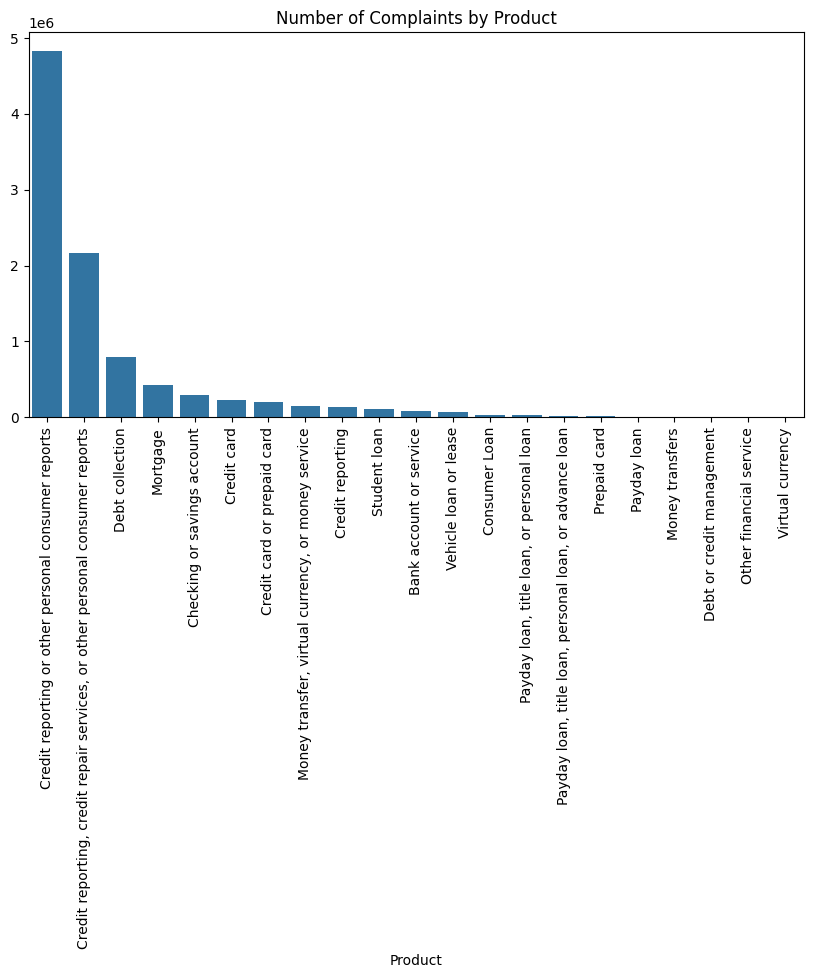

In [9]:
# Cell 4: Distribution of complaints by product
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title("Number of Complaints by Product")
plt.xticks(rotation=90)
plt.show()


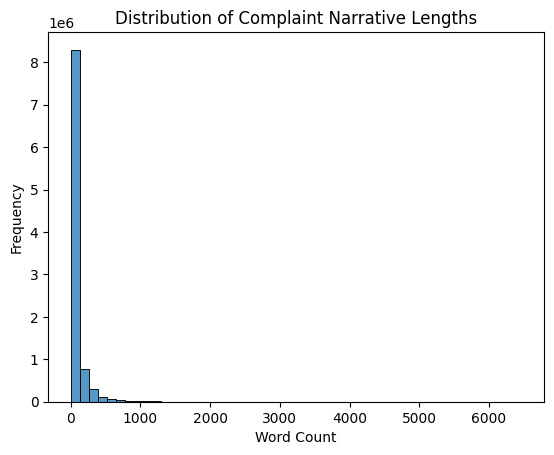

In [7]:
# Cell 5: Length of complaint narratives
df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(lambda x: len(x.split()))
sns.histplot(df['narrative_length'], bins=50)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [10]:
# Cell 6: Count of records with and without complaint narratives
has_narrative = df['Consumer complaint narrative'].notnull().sum()
no_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f"With Narrative: {has_narrative}")
print(f"Without Narrative: {no_narrative}")


With Narrative: 2980756
Without Narrative: 6629041


In [15]:
#PRINT THE UNIQUE PRODUCTS
print("Unique Products:")  
print(df['Product'].unique())
# Cell 7: Filter to 5 product categories
valid_products = [
    "Credit card", 
    "Payday loan, title loan, personal loan, or advance loan",
    "Payday loan, title loan, or personal loan", 
    "Buy Now, Pay Later", 
    "Checking or savings account", 
    "Money transfers"
]

filtered_df = df[df['Product'].isin(valid_products)]
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notnull()].copy()
filtered_df.shape


Unique Products:
['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Payday loan, title loan, or personal loan'
 'Bank account or service' 'Money transfers' 'Consumer Loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


(248617, 19)

In [16]:
# Cell 8: Clean narratives
def clean_text(text):
    text = text.lower()
    text = re.sub(r'i am writing.*?complaint', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].progress_apply(clean_text)


100%|██████████| 248617/248617 [00:26<00:00, 9242.62it/s] 


In [17]:
# Cell 9: Save cleaned dataset
output_path = "../data/filtered_complaints.csv"
os.makedirs("../data", exist_ok=True)
filtered_df.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to {output_path}")


Cleaned dataset saved to ../data/filtered_complaints.csv


# 📄 Summary of Findings

- The dataset contains complaints across many product types.
- A large proportion of complaints do **not** include narratives — these were excluded.
- Narrative lengths vary greatly, from under 10 words to over 500. We will chunk long ones in Task 2.